









































































































































































































































































































































































































































































































































































































# Linear Regression Model
This is a simple linear regression model in which i will try to find out the relationship between two indices DOW JONES and NIFTY 50 so that it can help to trade nifty by taking reference from dow jones.



__The question i'm trying to answer is does the explanatory variable(Dow jones) do a good job at predicting the dependent variable(Nifty 50)__

# __STEP 1:__ Import libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew



# __Step 2:__ Load Data and clean


In [2]:
#Load data through yahoo finance lib
df = yf.download(['^Dji','^NSEI'], start = '2020-01-01', end='2021-01-01')
#sort data to get only close price as input
df= df['Close']
#check for null values
df.isna().sum()
#drop null values
df = df.dropna()
df.head(5)


[*********************100%***********************]  2 of 2 completed


,^DJI,^NSEI
Date,,
2020-01-02,28868.800781,12282.200195
2020-01-03,28634.880859,12226.650391
2020-01-06,28703.380859,11993.049805
2020-01-07,28583.679688,12052.950195
2020-01-08,28745.089844,12025.349609


In [3]:
#change the columns name
new_columns = {'^DJI': 'Dow Jones', '^NSEI': 'Nifty50'}
df = df.rename(columns = new_columns)
df.head()

,Dow Jones,Nifty50
Date,,
2020-01-02,28868.800781,12282.200195
2020-01-03,28634.880859,12226.650391
2020-01-06,28703.380859,11993.049805
2020-01-07,28583.679688,12052.950195
2020-01-08,28745.089844,12025.349609


In [4]:
# check for data types
df.dtypes

Dow Jones    float64
Nifty50      float64
dtype: object

# STEP 3: Explore the data

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

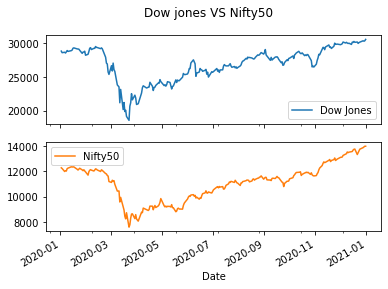

In [5]:
# visualize the data
df.plot(title = 'Dow jones VS Nifty50', subplots= True)


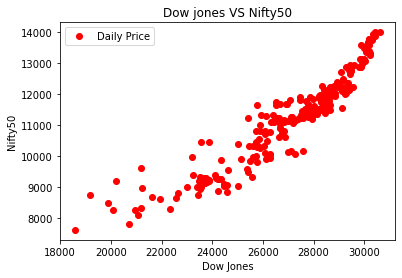

In [6]:
#plotting data
x = df['Dow Jones']
y = df['Nifty50']
# create scatter plot.
plt.plot(x, y, 'o', color = 'Red', label = 'Daily Price')
plt.title('Dow jones VS Nifty50')
plt.xlabel('Dow Jones')
plt.ylabel('Nifty50')
plt.legend()
plt.show()

In [7]:
# Measure the Correlation
df.corr()

,Dow Jones,Nifty50
Dow Jones,1.000000,0.935994
Nifty50,0.935994,1.000000


In [8]:
# stats summary
df.describe()

,Dow Jones,Nifty50
count,244.000000,244.000000
mean,26927.422475,11134.620093
std,2493.005598,1420.220930
min,18591.929688,7610.250000
25%,25727.750488,10084.125244
50%,27490.459961,11310.300293
75%,28811.665527,12062.062256
max,30606.480469,13981.950195


array([[<AxesSubplot:title={'center':'Dow Jones'}>,
        <AxesSubplot:title={'center':'Nifty50'}>]], dtype=object)

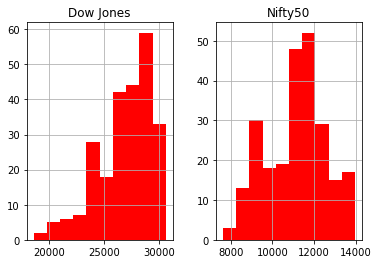

In [9]:
df.hist(color = 'Red')

In [10]:
#calculate kurtosis
dowjones_kurtosis = kurtosis(df['Dow Jones'])
nifty_kurtosis = kurtosis(df['Nifty50'])
#calculate skewness
dowjones_skew = skew(df['Dow Jones'])
nifty_skew = skew(df['Nifty50'])

display("Dowjones kurtosis: {:2}".format(dowjones_kurtosis))
display("Nifty kurtosis: {:2}".format(nifty_kurtosis))

display("Dowjones skew: {:2}".format(dowjones_skew))
display("Nifty skew: {:2}".format(nifty_skew))


'Dowjones kurtosis: 0.44185523029067'

'Nifty kurtosis: -0.5539716586206853'

'Dowjones skew: -0.9107289860510707'

'Nifty skew: -0.24537438524903107'

# Transform skewed data into normal distribution
As we can see that data of both variable is highly negatively skewed so we need to transform it first

In [11]:
df_tr = df['Dow Jones'].transform([np.reciprocal])

In [12]:
from scipy.stats import boxcox
df.insert(len(df.columns), 'Dowjones_trans', 
                  boxcox(df.iloc[:, 0])[0])


In [13]:
df = df.drop(columns=['Dow Jones'])

array([[<AxesSubplot:title={'center':'Nifty50'}>,
        <AxesSubplot:title={'center':'Dowjones_trans'}>]], dtype=object)

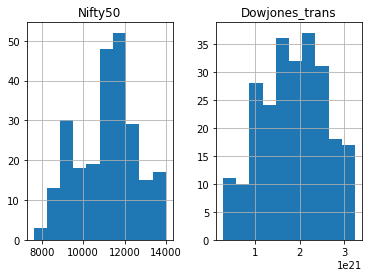

In [14]:
df.hist()

In [15]:
df_r = df['Nifty50'].transform([np.reciprocal])
df.insert(len(df.columns), 'Nifty50trans', 
                  boxcox(df.iloc[:, 0])[0])

array([[<AxesSubplot:title={'center':'Nifty50'}>,
        <AxesSubplot:title={'center':'Dowjones_trans'}>],
       [<AxesSubplot:title={'center':'Nifty50trans'}>, <AxesSubplot:>]],
      dtype=object)

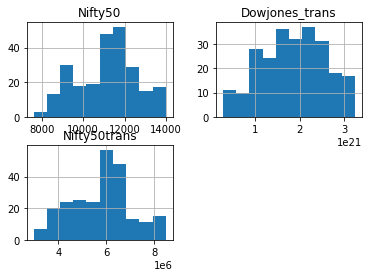

In [16]:
df.hist()

In [17]:
df =df.drop(columns=['Nifty50'])

array([[<AxesSubplot:title={'center':'Dowjones_trans'}>,
        <AxesSubplot:title={'center':'Nifty50trans'}>]], dtype=object)

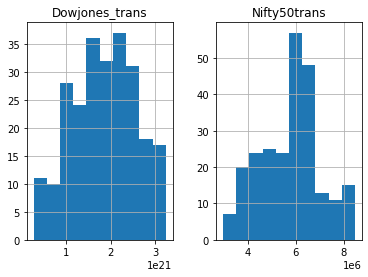

In [18]:
df.hist()

# Conclusion 
It can be seen from the above analysis that both indices are high correlated with each others but both were negatively skewed. I tried to transform it through various ways i.e reciprocating and taking log into consideration but still it has negative kurtosis which mean it is platykurtic and i dont know how to transform it further so this will be continued..